In [1]:
import os
import bilby
import json 
import numpy as np
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt

In [2]:
data_dir = "/home/joseph.bayley/data/CBC/O4MDC/o4_online/U1/"

In [31]:
# set the times for signal
trigger_time = 1325030418.015282
pad = 2
end_time = trigger_time + 0.25
duration = 2
start_time = end_time - duration

# set times for psd
roll_off = 0.4  
psd_duration = 32 * duration
psd_start_time = start_time - psd_duration
psd_end_time = start_time

sampling_frequency = 2048


asd_file = "/home/joseph.bayley/projects/o4_online_pe_mdc/data/asd_files/aLIGO_O4_high_asd.txt"
    
with open(os.path.join(data_dir,"meta.json"), "r") as f:
    data_info = json.load(f)
    
pars = data_info["injection"]
"""
truths = [data_info["injection"]["mass_1"],
              data_info["injection"]["mass_2"],
              data_info["injection"]["luminosity_distance"]/4,
              data_info["injection"]["geocent_time"],
              data_info["injection"]["phase"],
              data_info["injection"]["theta_jn"],
              data_info["injection"]["psi"],
              data_info["injection"]["a_1"],
              data_info["injection"]["a_2"],
              data_info["injection"]["tilt_1"],
              data_info["injection"]["tilt_2"],
              data_info["injection"]["phi_12"],
              data_info["injection"]["phi_jl"],
              data_info["injection"]["ra"],
              data_info["injection"]["dec"]]
"""
truths = [70,
              78,
              data_info["injection"]["luminosity_distance"]/8,
              data_info["injection"]["geocent_time"],
              data_info["injection"]["phase"],
              data_info["injection"]["theta_jn"],
              data_info["injection"]["psi"],
              data_info["injection"]["a_1"],
              data_info["injection"]["a_2"],
              data_info["injection"]["tilt_1"],
              data_info["injection"]["tilt_2"],
              data_info["injection"]["phi_12"],
              data_info["injection"]["phi_jl"],
              data_info["injection"]["ra"],
              data_info["injection"]["dec"]]

injection_parameters = dict(
        mass_1=pars['mass_1'],mass_2=pars['mass_2'], a_1=pars['a_1'], a_2=pars['a_2'], tilt_1=pars['tilt_1'], tilt_2=pars['tilt_2'],
        phi_12=pars['phi_12'], phi_jl=pars['phi_jl'], luminosity_distance=pars['luminosity_distance'], theta_jn=pars['theta_jn'], psi=pars['psi'],
        phase=pars['phase'], geocent_time=pars['geocent_time'], ra=pars['ra'], dec=pars['dec'])

waveform_arguments = dict(waveform_approximant='IMRPhenomPv2',
                              reference_frequency=20., minimum_frequency=20.)

waveform_generator = bilby.gw.WaveformGenerator(
        duration=duration, sampling_frequency=sampling_frequency,
        frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
        parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
        waveform_arguments=waveform_arguments,
        start_time=start_time)

wfg = waveform_generator

wfg.parameters = injection_parameters
freq_signal = wfg.frequency_domain_strain()
time_signal = wfg.time_domain_strain()
    


10:07 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [32]:
ifos = bilby.gw.detector.InterferometerList(["H1","L1"])

In [33]:
for int_idx,ifo in enumerate(ifos):
    ifo.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(asd_file=asd_file)

In [34]:
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=start_time)

/home/joseph.bayley/.local/lib/python3.7/site-packages/bilby/gw/detector/psd.py:362: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise


In [35]:
ifos.inject_signal(waveform_generator=waveform_generator,
                       parameters=injection_parameters)

10:07 bilby INFO    : Injected signal in H1:
10:07 bilby INFO    :   optimal SNR = 12.28
10:07 bilby INFO    :   matched filter SNR = 9.98-0.70j
10:07 bilby INFO    :   mass_1 = 37.72398420033535
10:07 bilby INFO    :   mass_2 = 33.00501646542621
10:07 bilby INFO    :   a_1 = 0.21959818254342153
10:07 bilby INFO    :   a_2 = 0.17959754525911098
10:07 bilby INFO    :   tilt_1 = 0.8121181766872086
10:07 bilby INFO    :   tilt_2 = 0.8120517047665483
10:07 bilby INFO    :   phi_12 = 0.3649500985631483
10:07 bilby INFO    :   phi_jl = 5.442345232562516
10:07 bilby INFO    :   luminosity_distance = 2821.546494205912
10:07 bilby INFO    :   theta_jn = 2.792898560462771
10:07 bilby INFO    :   psi = 2.615195684873492
10:07 bilby INFO    :   phase = 1.3341659803533248
10:07 bilby INFO    :   geocent_time = 1325030417.9363651
10:07 bilby INFO    :   ra = 0.12933619211510794
10:07 bilby INFO    :   dec = 0.42920182457528133
10:07 bilby INFO    : Injected signal in L1:
10:07 bilby INFO    :   opti

[{'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

In [36]:
ifo_list = bilby.gw.detector.InterferometerList([])
for i, det in enumerate(["H1","L1"]):
    
    ifo = bilby.gw.detector.get_empty_interferometer(det)
    file_name = os.path.join(data_dir,"{}-O4MDC-1325029268-1152.gwf".format(det))
    channel_name = "{}:O4MDC".format(det)

    # load timeseries from start to end time for signal
    ts = TimeSeries.read(file_name,channel_name, start = start_time, end = end_time)
    ts_resamp = ts.resample(sampling_frequency)

    ifo.strain_data.set_from_gwpy_timeseries(ts_resamp)
    # set psd as same from o4
    ifo.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(asd_file=asd_file)

    ifo_list.append(ifo)



In [37]:
whitened_h1 = []
whitened_sig = []
Nt = int(sampling_frequency*duration)
for ind in range(2):
        ifo1 = ifo_list[ind]
        
        signal_fd = ifos[i].get_detector_response(freq_signal, injection_parameters)
    
        whitened_signal_fd = signal_fd/ifos[i].amplitude_spectral_density_array
    
        whitened_signal_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_signal_fd)
        
        whitened_sig.append([whitened_signal_td])

        Nt1 = int(ifo1.sampling_frequency*ifo1.duration)
        # whiten the data by dividing by psd
        h_fd1, h_fa1 = bilby.utils.nfft(ifo1.strain_data.time_domain_strain, ifo1.strain_data.sampling_frequency)
        whitened_h_fd1 = h_fd1/ifo1.amplitude_spectral_density_array
        whitened_h_td1 = np.sqrt(2.0*Nt1)*np.fft.irfft(whitened_h_fd1)

        whitened_h1.append([whitened_h_td1])



whitened_h1 = np.transpose(whitened_h1, [1,2,0])
whitened_sig = np.transpose(whitened_sig, [1,2,0])

In [38]:
print(np.shape(whitened_h1))
print(np.shape(whitened_sig))

(1, 4096, 2)
(1, 4096, 2)


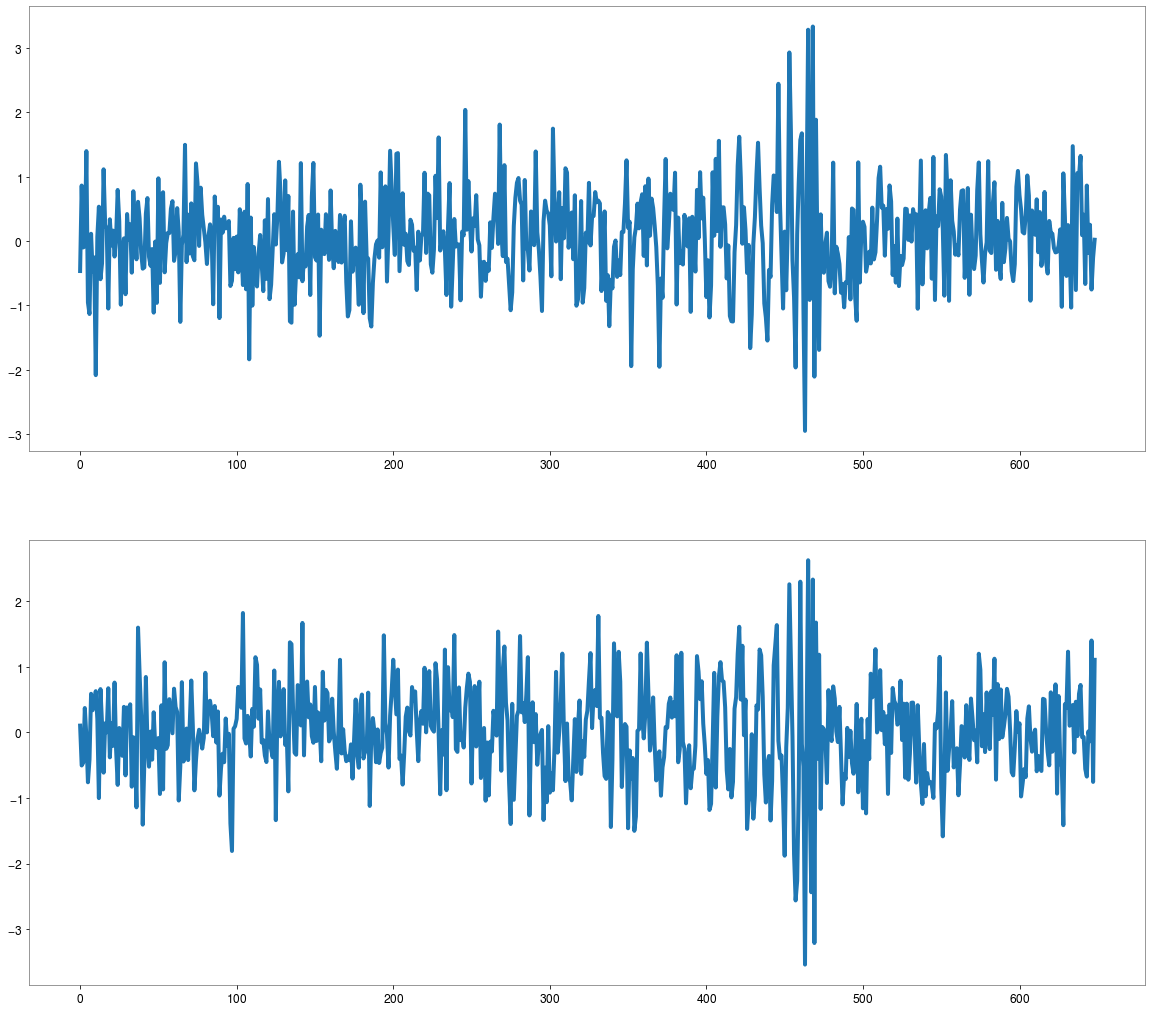

In [76]:
fig, ax = plt.subplots(nrows = 2, figsize = (20,18))
for i in range(2):
    #ax[i].plot(whitened_h1[0][:,i])
    data = whitened_sig[0][1500:, i][::4]
    #data = np.array([np.mean(data[j:j+2]) for j in range(len(data))])[::4]
    ax[i].plot(data + np.random.normal(scale = 0.6,size = len(data)), lw= 4)
    ax[i].grid(False)

In [21]:
a = np.array([0,1,2,3,4,5,6])
b = np.array([1,2,3,4,5,6,7])

In [61]:
ab = (b<6)&(b>2)&(a > 2)&(b<6)
print(ab)

[False False False  True  True False False]


In [64]:
abind = np.where(ab)[0]

In [66]:
a[abind]

array([3, 4])